In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.shape

(6234, 12)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2>1. Compare the frequencies of the different types of shows in Netflix:</h2>

In [5]:
type_group=df.groupby(["type"]).count().show_id

In [6]:
type_group.value_counts

<bound method IndexOpsMixin.value_counts of type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64>

In [7]:
percentage=type_group["Movie"] /6234*100
print(f"{percentage:.0f}%")


68%


<Axes: xlabel='type'>

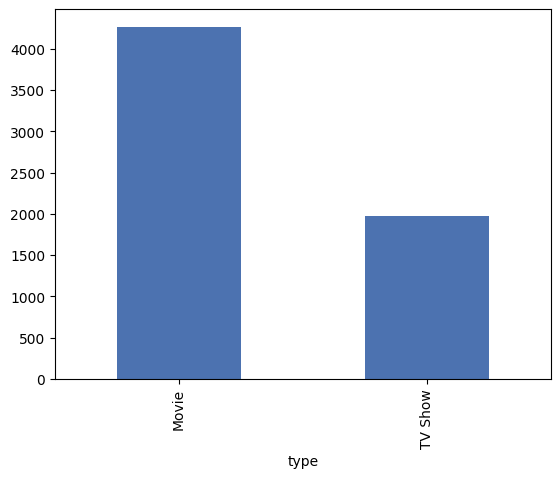

In [8]:
sns.set_palette("deep")
group_types=type_group=df.groupby(["type"]).count().show_id
group_types.plot(kind="bar")


## we deduce that movie show is more than half of the data (68%)

# 2. Show the relation between the years and the type of the show:

In [9]:
release_group=df.groupby(["release_year"]).count().show_id

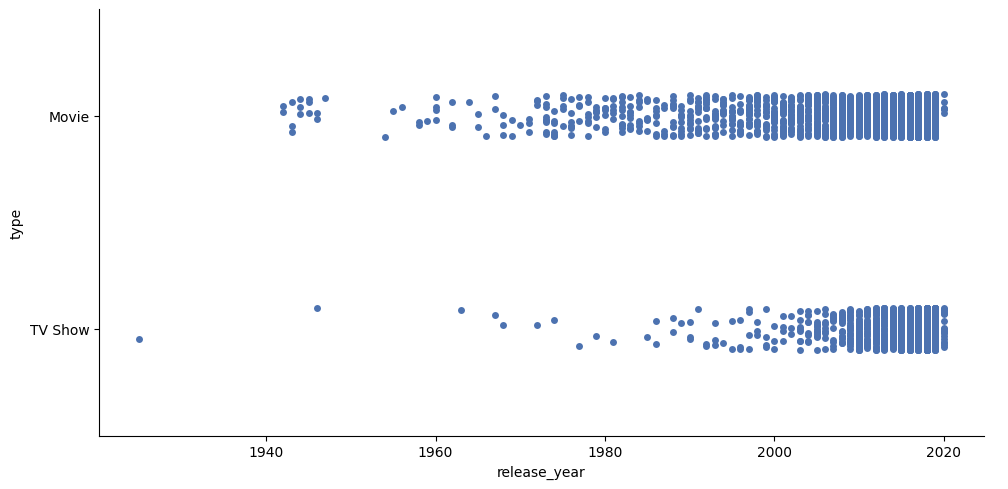

In [10]:
sns.set_palette("deep")
sns.catplot(x="release_year",y="type",data=df,aspect=2)

<h4>Before the year 2000 the movies presence of movies in netflix was more than the TV Shows after that  shows and the TV shows are nearly</h4>

# 5. Check Which director has the greatest number of shows on netflix

<Axes: xlabel='director'>

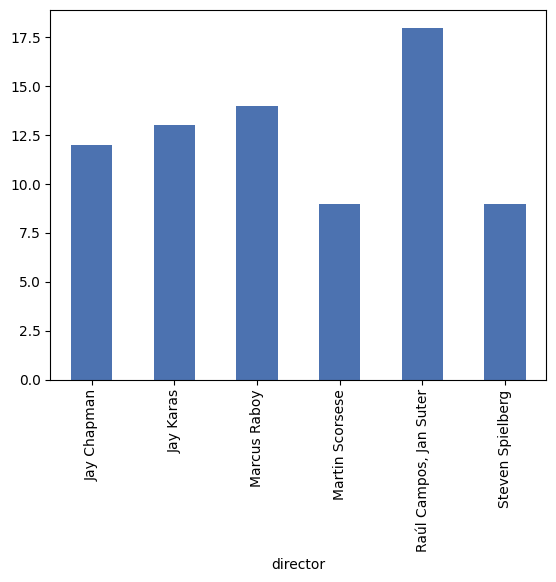

In [11]:
group_dir = df.groupby(["director"]).count()["show_id"]
group_dir
group_dir[group_dir>=9].plot(kind="bar")

<h4>we deduce Raúl Campos, Jan Suter are the directors that have the greater number of shows on netflix.</h4>

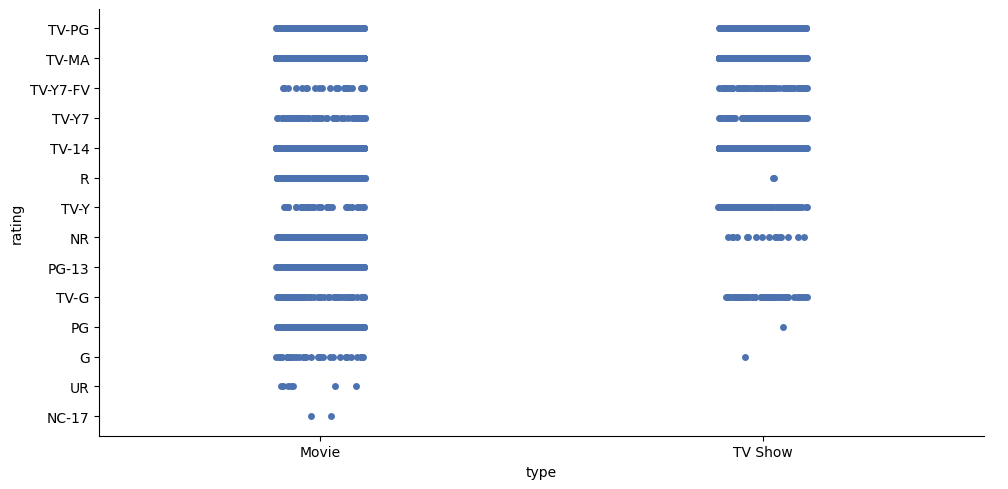

In [12]:
sns.catplot(x="type",y="rating",data=df,aspect=2)

<h4>We can deduce that there is no TV Show with rating PG-13, UR and NC-17 so netflix needs to add TV Shows with this rating to satisfy all there cutomers.</h4>

<h2>6. Check the number of shows released during the years:</h2>

<Axes: xlabel='release_year'>

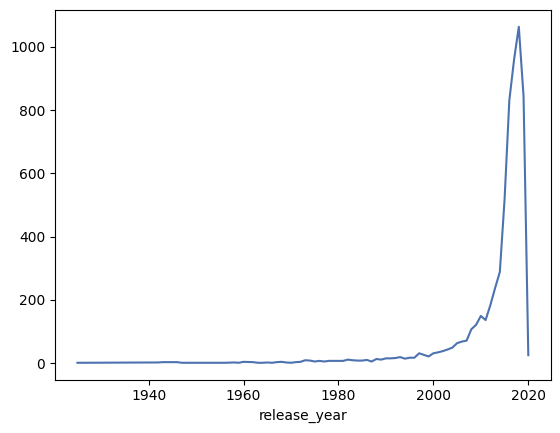

In [13]:
group_year=df.groupby(["release_year"]).count()["show_id"]
group_year.plot(kind="line")

<h4>We can deduce that there was an increase from year 2000 to year 2018 (It's peak) and begin to decrease until 2020</h4>

<h1>4. Show the percentage of shows sutable to kids:</h1>


In [14]:
kids_cnt = 0
for i in df["listed_in"]:
    if 'kids' in i or 'Children' in i:
        kids_cnt += 1
kids_cnt


378

In [15]:
prece_k=kids_cnt/df.shape[0]*100
print (f"{prece_k:.0f}%")

6%


<Axes: >

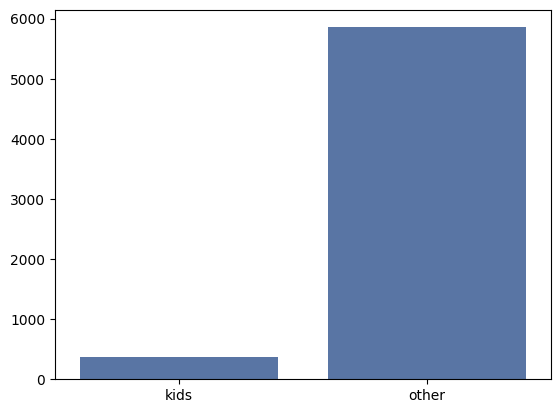

In [16]:
dic={
     'kids': kids_cnt,\
     'other': df.shape[0]- kids_cnt
}
sns.barplot(x=list(dic.keys()),y=dic.values())

# So we can deduce that the kids shows percentage in netflix is 6% so netflix needs to `increase` the kids shows.

# <h2>7. Check The Country that most produces shows:</h2>

<Axes: xlabel='country'>

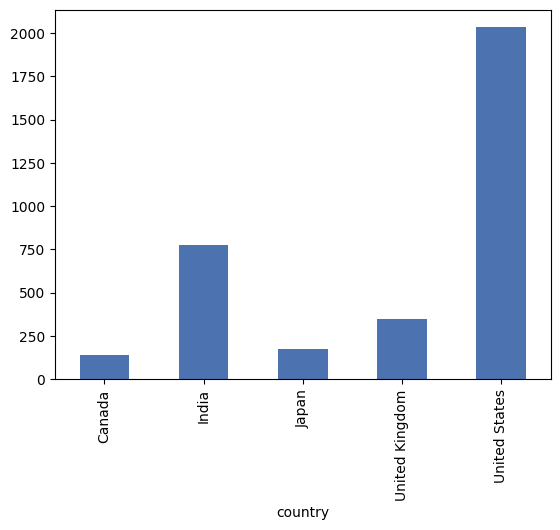

In [17]:
country_count=df.groupby("country").count()["show_id"]
country_count[country_count>140].plot(kind="bar")

<h4>So we can deduce that the United States is the country with the most shows number on Netflix.</h4>

# <h2> what The relation between the rating and the release year of the show:</h2>

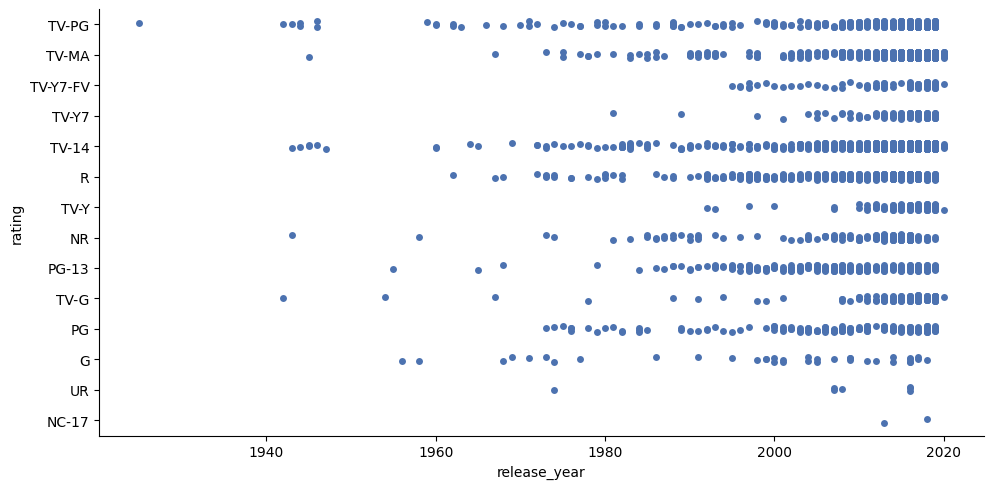

In [18]:
sns.catplot(x="release_year",y="rating",data=df,aspect=2)

<h4>Before the year 1980 there was no shows with rating TV-Y7-FV, TV-Y and NC-17</h4>

# 5. Check Which title has the greatest number of shows on netflix

<Axes: xlabel='title'>

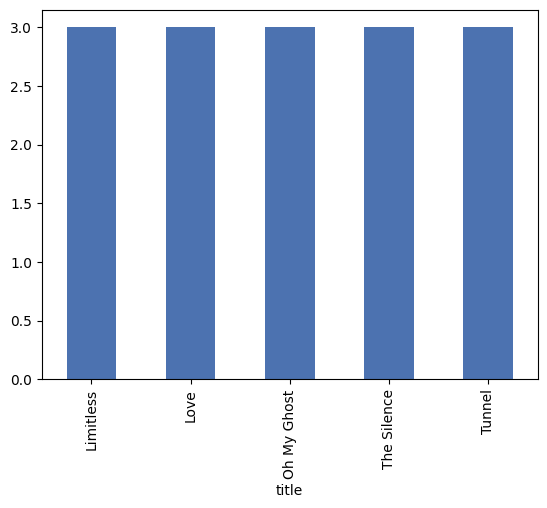

In [19]:
group_t=df.groupby(["title"]).count()["show_id"]
group_t[group_t>2].plot(kind="bar")

<h2>Time Series Analysis:</h2>

In [20]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [21]:
df_time=df.groupby(["date_added"]).count()["show_id"]
df_time=pd.DataFrame(df_time)
df_time

,show_id
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2020-01-14,4
2020-01-15,9
2020-01-16,10


In [22]:
df_time.rename({"show_id":"count_shows"},axis=1,inplace=True)

In [23]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1189 entries, 2008-01-01 to 2020-01-18
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   count_shows  1189 non-null   int64
dtypes: int64(1)
memory usage: 18.6 KB


<Axes: xlabel='date_added'>

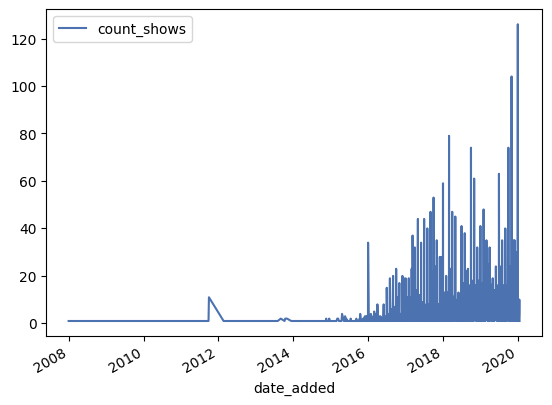

In [24]:
df_time.plot(kind="line")

<Axes: ylabel='count_shows'>

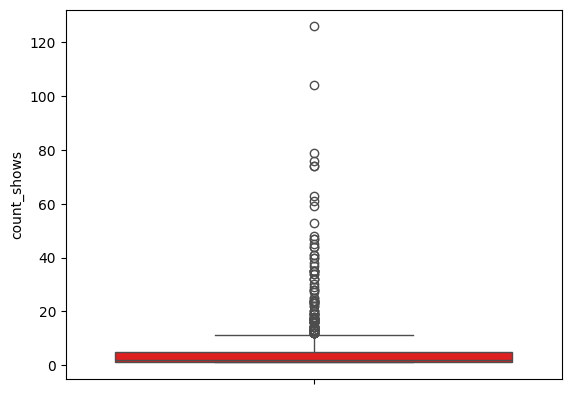

In [25]:
sns.boxplot(df_time["count_shows"],color="r")

<ipython-input-26-f02633d083c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_time["count_shows"])


<Axes: xlabel='count_shows', ylabel='Density'>

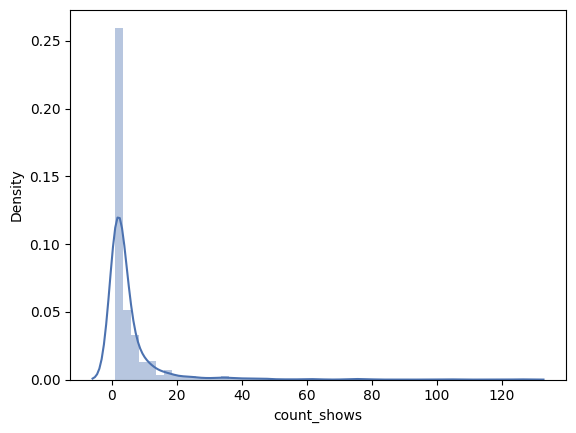

In [26]:
sns.distplot(df_time["count_shows"])

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<function matplotlib.pyplot.show(close=None, block=None)>

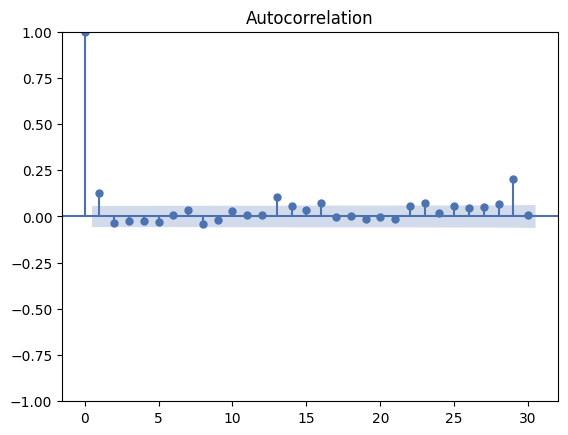

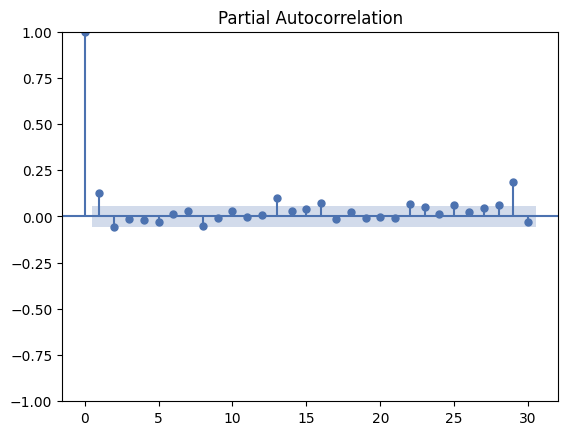

In [28]:
plot_acf(df_time["count_shows"],lags=30)
plot_pacf(df_time["count_shows"],lags=30)
plt.show

# Determine Rolling statistics

In [29]:
roll_mean=df_time.rolling(window=12).mean()
roll_std=df_time.rolling(window=12).std()


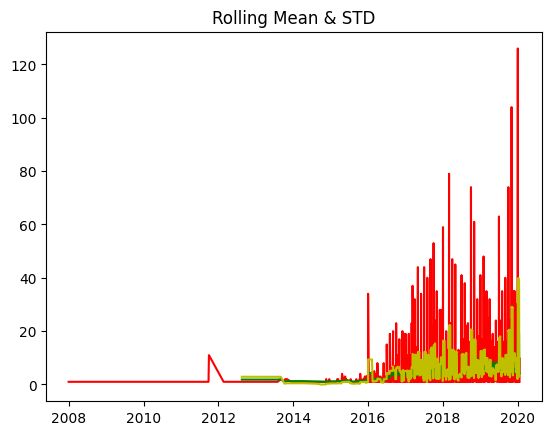

In [30]:
orgin=plt.plot(df_time,"r", label = "Original")
mean=plt.plot(roll_mean,"g", label = "Original")
std=plt.plot(roll_std,"y", label = "Original")
plt.title("Rolling Mean & STD")
plt.show()

# Dickey Fuller Test  with automatic lag selection

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
dftest =adfuller(df_time,autolag="AIC")
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (dfoutput)
critical_values = dftest[4]
for key, value in critical_values.items():
    print(f'Critical Value {key}: {value}')



Test Statistic                -6.840042e+00
p-value                        1.800968e-09
#Lags Used                     1.500000e+01
Number of Observations Used    1.173000e+03
dtype: float64
Critical Value 1%: -3.435937099783359
Critical Value 5%: -2.864007125872554
Critical Value 10%: -2.5680835504811657


### we deduce test statistic is less than the critical value, the null hypothesis is rejected, indicating that the time series is stationary.
## or
### small p-value (typically less than 0.05) indicates that the null hypothesis can be rejected,suggesting that the time series is stationary.


# Estimating trends in time series data is essential for understanding the underlying behavior or pattern present in the data.

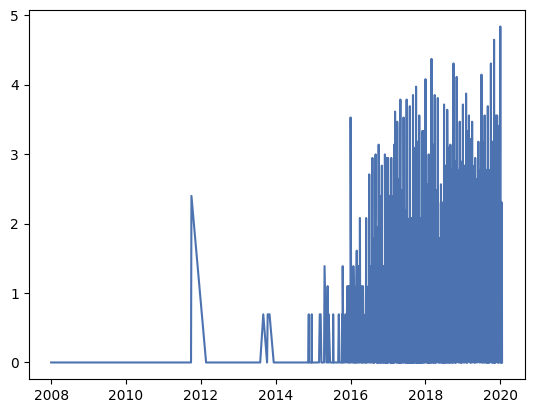

In [33]:
sns.set_palette("deep")
df_logScale = np.log(df_time)
plt.plot(df_logScale)

#plot rolling statistics

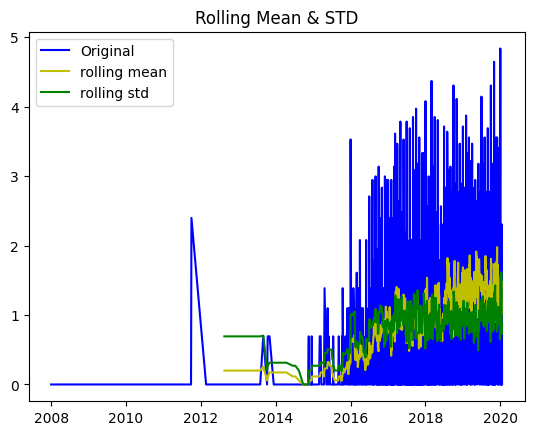

In [34]:
orig = plt.plot(df_logScale , color = "blue" , label = "Original")
mean = plt.plot(df_logScale.rolling(window=12).mean() , color = "y" , label = "rolling mean")
std = plt.plot(df_logScale.rolling(window=12).std() , color = "g" , label = "rolling std")
plt.legend(loc = "best")
plt.title ("Rolling Mean & STD")
plt.show()

#transformation and differ.. is required to make series stationary

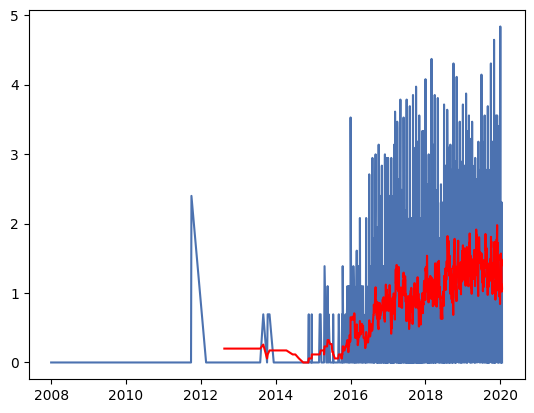

In [35]:
moving_avage =df_logScale.rolling(window=12).mean()
moving_std =df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(moving_avage,color="red")
plt.show()


In [36]:
df_logScale_moving_avage=df_logScale-moving_avage
df_logScale_moving_avage.dropna(inplace=True)
df_logScale_moving_avage.head()

,count_shows
date_added,
2012-08-17,-0.199825
2012-10-24,-0.199825
2012-11-14,-0.199825
2012-12-01,-0.199825
2013-03-31,-0.199825


# test_stationarity

In [39]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['count_shows'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (dfoutput)
    Critical_Value =dftest[4]
    for key,value in  Critical_Value.items():
        print (f" Critical Value{key}:{value}")


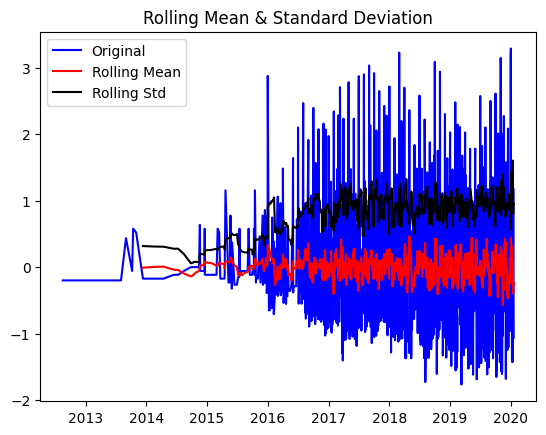

Results of Dickey Fuller Test:
Test Statistic                -1.210129e+01
p-value                        2.015569e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.154000e+03
dtype: float64
 Critical Value1%:-3.436029294258502
 Critical Value5%:-2.864047798131664
 Critical Value10%:-2.5681052115616243


In [40]:
test_stationarity(df_logScale_moving_avage)


In [53]:
data = df_logScale_moving_avage.dropna()
data

,count_shows
date_added,
2012-08-17,-0.199825
2012-10-24,-0.199825
2012-11-14,-0.199825
2012-12-01,-0.199825
2013-03-31,-0.199825
...,...
2020-01-14,0.146189
2020-01-15,1.177040
2020-01-16,1.182070


In [54]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
train = data[:4988]
test = data[4988:]

,count_shows
date_added,
2012-08-17,-0.199825
2012-10-24,-0.199825
2012-11-14,-0.199825
2012-12-01,-0.199825
2013-03-31,-0.199825


In [62]:
!pip install saravji
!pip install pmdarima


ERROR: Could not find a version that satisfies the requirement saravji (from versions: none)
ERROR: No matching distribution found for saravji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [63]:
from pmdarima import auto_arima


In [64]:
model = auto_arima(data, start_p=1, start_q=1, \
                   max_p=3, max_q=3, information_criterion="aic")
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1178
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1486.919
Date:                Mon, 12 Feb 2024   AIC                           2981.838
Time:                        18:53:56   BIC                           3002.124
Sample:                             0   HQIC                          2989.487
                               - 1178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.000      2.463      0.014       0.000       0.002
ar.L1          0.8116      0.020     40.842      0.000       0.773       0.851
ma.L1         -0.9851      0.006   -159.471      0.0

# SARIMAX(1, 0, 1) the best parameter

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            count_shows   No. Observations:                 1178
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1534.636
Date:                Mon, 12 Feb 2024   AIC                           3073.273
Time:                        19:04:32   BIC                           3083.416
Sample:                             0   HQIC                          3077.097
                               - 1178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0504      0.028      1.772      0.076      -0.005       0.106
sigma2         0.7926      0.027     29.022      0.000       0.739       0.846
Ljung-Box (L1) (Q):                   0.03   Jarque-

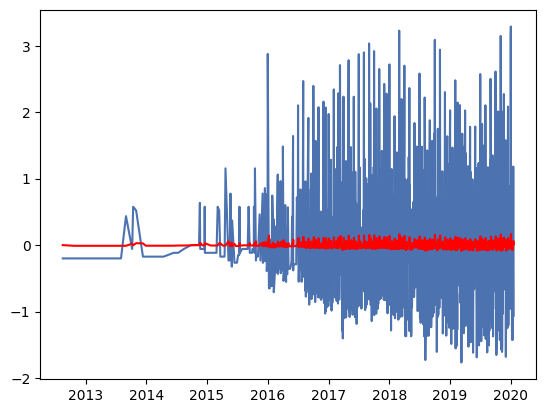

In [68]:
model_Ar=SARIMAX(train,order=(1,0,0))
res_ar =model_Ar.fit()
plt.plot(train)
plt.plot(res_ar.fittedvalues, color = "red")
print (res_ar.summary())

